In [18]:
import pandas as pd
excel = pd.read_excel('result.xlsx')

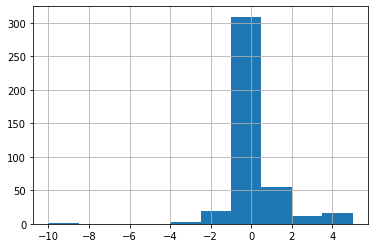

In [19]:
excel.SDG_11_NET_ALIGNMENT_SCORE.hist()

In [20]:
realestate = ['Building Products', 'Real Estate Operating Companies', 'Diversified REITs', 'Homebuilding', 'Construction Materials', 'Construction & Engineering', 'Retail REITs']
banks = ['Diversified Banks']
energy = ['Electric Utilities', 'Multi-Utilities', 'Heavy Electrical Equipment', 'Gas Utilities', 'Renewable Electricity']
materials = ['Water Utilities', 'Oil & Gas Exploration & Production', 'Steel']

selected = realestate + banks + energy + materials

excel = excel.loc[excel.GICS_SUB_IND.isin(selected),:]

In [21]:
excel.loc[excel.ISSUER_TICKER=='GBUG',:]

,ISSUER_NAME,ISSUERID,ISSUER_TICKER,ISSUER_CUSIP,ISSUER_SEDOL,ISSUER_ISIN,ISSUER_CNTRY_DOMICILE,INDUSTRY_ADJUSTED_SCORE,SDG_11_NET_ALIGNMENT_SCORE,CT_GREEN_BLDG_MAX_REV,GICS_SUB_IND,OPPS_GREEN_BUILDING_EXP_SCORE
49,BARCLAYS PLC,IID000000002132088,GBUG,06738E204,3134865,GB0031348658,GB,8.57,-0.5,0.0,Diversified Banks,0.0


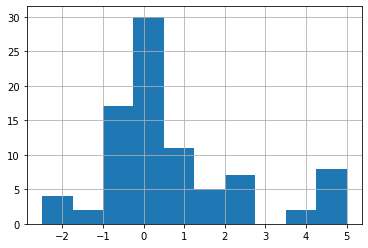

In [22]:
excel.SDG_11_NET_ALIGNMENT_SCORE.hist()

In [23]:
#import yfinance as yf  

#dataLong = yf.download(excel.ISSUER_TICKER.values.tolist(),'2020-05-06','2022-05-06')
#dataLong['Close'].to_csv('dataLongESGHackathonSmartCity.csv')

In [24]:
dataLong = pd.read_csv('dataLongESGHackathonSmartCity.csv')

In [25]:
excel.loc[excel.ISSUER_TICKER == 'SAN']

,ISSUER_NAME,ISSUERID,ISSUER_TICKER,ISSUER_CUSIP,ISSUER_SEDOL,ISSUER_ISIN,ISSUER_CNTRY_DOMICILE,INDUSTRY_ADJUSTED_SCORE,SDG_11_NET_ALIGNMENT_SCORE,CT_GREEN_BLDG_MAX_REV,GICS_SUB_IND,OPPS_GREEN_BUILDING_EXP_SCORE
181,"BANCO SANTANDER, S.A.",IID000000002159005,SAN,05964H105,5705946,ES0113900J37,ES,7.6,-0.5,0.0,Diversified Banks,0.0


In [26]:
port = dataLong.dropna(axis=1)

In [27]:
port['ISP'] #price doesn't change, exclude
port = port.drop('ISP', axis=1)

In [28]:
#port = port.drop('SAN', axis=1) #two SAN tickers

In [29]:
esg = excel.loc[excel.ISSUER_TICKER.isin(port.columns), ['ISSUER_TICKER', 'SDG_11_NET_ALIGNMENT_SCORE']].set_index('ISSUER_TICKER')['SDG_11_NET_ALIGNMENT_SCORE']

In [30]:
port = port.set_index('Date')

In [31]:
port.columns

Index(['ACA', 'BBVA', 'CRH', 'DG', 'EBS', 'EDF', 'ENG', 'ENR', 'FBK', 'GBUG',
       'HEI', 'LAND', 'LEG', 'NWG', 'PSN', 'SAN', 'SRG', 'SVT', 'TRN', 'VOE'],
      dtype='object')

In [32]:
import edhec_risk_kit_207 as erk

In [33]:
rets = (port.shift(-1)-port)/port

In [34]:
PERIODS_PER_YEAR = 261
RISKFREE_RATE = 0.01

In [73]:
er_train = erk.annualize_rets(rets[:'2021-05'],PERIODS_PER_YEAR)

In [37]:
#importlib.reload(edhec_risk_kit_207)
erk.summary_stats(rets.dropna(), RISKFREE_RATE, PERIODS_PER_YEAR)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
ACA,0.252549,0.388181,-0.233446,7.487217,0.037725,0.050507,0.618666,-0.360106
BBVA,0.282125,0.448359,0.601813,7.299960,0.036933,0.059210,0.600942,-0.374372
CRH,0.177524,0.325515,0.142291,5.071242,0.030617,0.042069,0.509562,-0.296699
DG,0.161539,0.232767,-0.083119,4.175379,0.022995,0.033040,0.644610,-0.209552
EBS,-0.372424,0.611243,-2.222502,22.935087,0.068350,0.091043,-0.619482,-0.760783
EDF,-0.055725,0.243612,-0.931631,7.539105,0.027247,0.039175,-0.267136,-0.383408
ENG,0.112925,1.517021,3.846832,29.261848,-0.028167,0.130980,0.067154,-0.902890
ENR,-0.125501,0.320377,-1.620762,13.649244,0.036791,0.048496,-0.418774,-0.445451
FBK,0.372577,0.400352,0.340064,5.484600,0.035514,0.051121,0.896710,-0.273450
GBUG,0.052742,0.164349,-1.066728,8.322794,0.018240,0.025260,0.257499,-0.195995


In [38]:
ew = erk.weight_ew(rets)

In [40]:
esg

ISSUER_TICKER
ACA     0.0
CRH     0.0
GBUG   -0.5
ENG    -0.5
VOE    -0.5
SVT    -0.5
EDF    -1.0
HEI     0.0
EBS     0.0
BBVA    0.0
SAN    -0.5
LAND    5.0
PSN     2.0
NWG     0.0
SRG    -0.5
TRN     0.0
DG      1.5
LEG     5.0
FBK     0.0
ENR    -2.0
Name: SDG_11_NET_ALIGNMENT_SCORE, dtype: float64

In [41]:
erk.portfolio_esg(ew, esg)

0.375

In [56]:
TARGET_ESG = 2

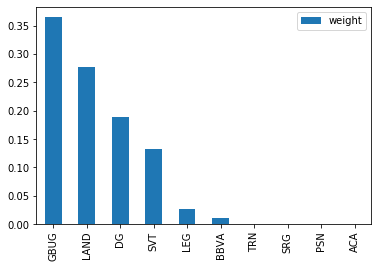

In [57]:
sdg_weights = erk.minimize_vol_esg(TARGET_ESG, esg, rets[:'2021-05'].cov())

pd.DataFrame(sdg_weights, index=rets.columns, columns=['weight']).sort_values(by='weight', ascending=False)[:10].plot(kind='bar')

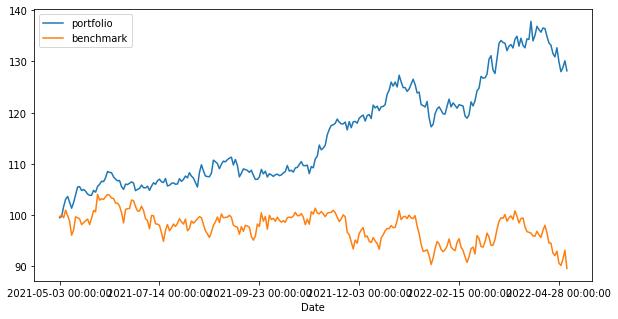

In [66]:
our = 100*(1+erk.portfolio_return(sdg_weights, rets.T)).to_frame('portfolio')['2021-05':].cumprod().dropna()
benchmark = 100*(1+erk.portfolio_return(ew, rets.T)).to_frame('benchmark')['2021-05':].cumprod().dropna()

our.merge(benchmark, how='inner', left_index=True, right_index=True).plot(figsize=(10, 5))

In [77]:
fp_return = erk.annualize_rets(erk.portfolio_return(sdg_weights, rets['2021-05':].T), PERIODS_PER_YEAR).round(4)*100
fp_return

28.77

In [78]:
fp_vol = erk.annualize_vol(erk.portfolio_return(sdg_weights, rets['2021-05':].T), PERIODS_PER_YEAR)*100
fp_vol 

15.175738107319953

In [52]:
erk.portfolio_esg(sdg_weights, esg).round(2)

2.0

In [82]:
final_portfolio = pd.DataFrame(sdg_weights, index=rets.columns, columns=['weight']).sort_values(by='weight', ascending=False)[:8]

import numpy as np
fp = final_portfolio.merge(excel[['ISSUER_NAME', 'GICS_SUB_IND', 'ISSUER_TICKER', 'SDG_11_NET_ALIGNMENT_SCORE', 'INDUSTRY_ADJUSTED_SCORE', 'CT_GREEN_BLDG_MAX_REV', 'OPPS_GREEN_BUILDING_EXP_SCORE']].set_index('ISSUER_TICKER'), how='left', left_index=True, right_index=True)
fp.weight = fp.weight*100
fp.weight = fp.weight.round(1)
fp.rename(columns={'SDG_11_NET_ALIGNMENT_SCORE': 'SDG-11', 'INDUSTRY_ADJUSTED_SCORE' : 'ESG-score', 'CT_GREEN_BLDG_MAX_REV': '% Revenue spent on green', 'weight':'(%) weight'}, inplace=True)
fp.loc[fp['% Revenue spent on green']==0,'% Revenue spent on green'] = np.nan
fp.loc[fp['OPPS_GREEN_BUILDING_EXP_SCORE']==0,'OPPS_GREEN_BUILDING_EXP_SCORE'] = np.nan

fp

,(%) weight,ISSUER_NAME,GICS_SUB_IND,SDG-11,ESG-score,% Revenue spent on green,OPPS_GREEN_BUILDING_EXP_SCORE
GBUG,36.5,BARCLAYS PLC,Diversified Banks,-0.5,8.57,NaN,NaN
LAND,27.7,LAND SECURITIES GROUP PLC,Diversified REITs,5.0,8.40,50.25,6.7
DG,19.0,VINCI SA,Construction & Engineering,1.5,6.00,7.97,0.2
SVT,13.2,SEVERN TRENT PLC,Water Utilities,-0.5,7.70,NaN,NaN
LEG,2.7,LEG Immobilien SE,Real Estate Operating Companies,5.0,8.20,NaN,4.9
BBVA,1.0,"Banco Bilbao Vizcaya Argentaria, S.A.",Diversified Banks,0.0,10.00,NaN,NaN
TRN,0.0,TERNA - RETE ELETTRICA NAZIONALE SOCIETA PER A...,Electric Utilities,0.0,8.20,NaN,NaN
SRG,0.0,SNAM S.P.A.,Gas Utilities,-0.5,6.70,NaN,NaN


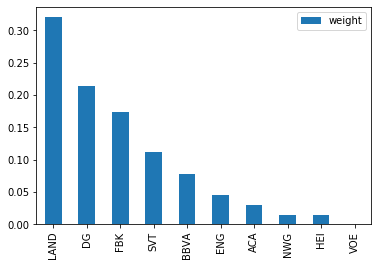

In [74]:
msr_esg_weights = erk.msr_esg(RISKFREE_RATE, er_train, rets[:'2021-05'].cov(), esg, TARGET_ESG)

pd.DataFrame(msr_esg_weights, index=rets.columns, columns=['weight']).sort_values(by='weight', ascending=False)[:10].plot(kind='bar')

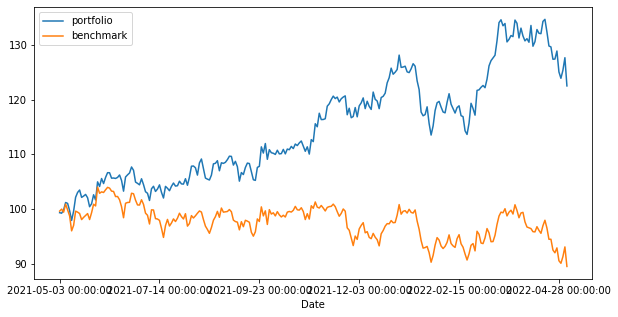

In [75]:
our = 100*(1+erk.portfolio_return(msr_esg_weights, rets.T)).to_frame('portfolio')['2021-05':].cumprod().dropna()
benchmark = 100*(1+erk.portfolio_return(ew, rets.T)).to_frame('benchmark')['2021-05':].cumprod().dropna()

our.merge(benchmark, how='inner', left_index=True, right_index=True).plot(figsize=(10, 5))

In [79]:
fp_return = erk.annualize_rets(erk.portfolio_return(msr_esg_weights, rets['2021-05':].T), PERIODS_PER_YEAR).round(4)*100
fp_return

22.97

In [80]:
fp_vol = erk.annualize_vol(erk.portfolio_return(msr_esg_weights, rets['2021-05':].T), PERIODS_PER_YEAR)*100
fp_vol 

20.925421027188836

In [81]:
erk.portfolio_esg(msr_esg_weights, esg).round(2)

2.0

In [84]:
final_portfolio = pd.DataFrame(msr_esg_weights, index=rets.columns, columns=['weight']).sort_values(by='weight', ascending=False)[:8]

import numpy as np
fp = final_portfolio.merge(excel[['ISSUER_NAME', 'GICS_SUB_IND', 'ISSUER_TICKER', 'SDG_11_NET_ALIGNMENT_SCORE', 'INDUSTRY_ADJUSTED_SCORE', 'CT_GREEN_BLDG_MAX_REV', 'OPPS_GREEN_BUILDING_EXP_SCORE']].set_index('ISSUER_TICKER'), how='left', left_index=True, right_index=True)
fp.weight = fp.weight*100
fp.weight = fp.weight.round(1)
fp.rename(columns={'SDG_11_NET_ALIGNMENT_SCORE': 'SDG-11', 'INDUSTRY_ADJUSTED_SCORE' : 'ESG-score', 'CT_GREEN_BLDG_MAX_REV': '% Revenue spent on green', 'weight':'(%) weight'}, inplace=True)
fp.loc[fp['% Revenue spent on green']==0,'% Revenue spent on green'] = np.nan
fp.loc[fp['OPPS_GREEN_BUILDING_EXP_SCORE']==0,'OPPS_GREEN_BUILDING_EXP_SCORE'] = np.nan

fp

,(%) weight,ISSUER_NAME,GICS_SUB_IND,SDG-11,ESG-score,% Revenue spent on green,OPPS_GREEN_BUILDING_EXP_SCORE
LAND,32.1,LAND SECURITIES GROUP PLC,Diversified REITs,5.0,8.4,50.25,6.7
DG,21.4,VINCI SA,Construction & Engineering,1.5,6.0,7.97,0.2
FBK,17.4,FINECOBANK BANCA FINECO S.P.A.,Diversified Banks,0.0,6.6,NaN,NaN
SVT,11.1,SEVERN TRENT PLC,Water Utilities,-0.5,7.7,NaN,NaN
BBVA,7.7,"Banco Bilbao Vizcaya Argentaria, S.A.",Diversified Banks,0.0,10.0,NaN,NaN
ENG,4.5,"Enagas, S.A.",Gas Utilities,-0.5,7.4,NaN,NaN
ACA,2.9,CREDIT AGRICOLE SA,Diversified Banks,0.0,7.1,NaN,NaN
NWG,1.5,NATWEST GROUP PLC,Diversified Banks,0.0,8.5,NaN,NaN


In [87]:
#pd.DataFrame(erk.minimize_vol(0.5, er, rets.cov()), index=rets.columns, columns=['weight']).sort_values(by='weight', ascending=False)[:10].plot(kind='bar')

In [86]:
#pd.DataFrame(erk.msr(RISKFREE_RATE, er, rets.cov()), index=rets.columns, columns=['weight']).sort_values(by='weight', ascending=False)[:10].plot(kind='bar')

In [85]:
#pd.DataFrame(erk.gmv(rets.cov()), index=rets.columns, columns=['weight']).sort_values(by='weight', ascending=False)[:10].plot(kind='bar')